In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import seaborn
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
puma = pd.read_csv("../Data/Cleaned/puma_all.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
puma.columns

Index([u'Unnamed: 0', u'SERIALNO', u'Official_Poverty', u'CEO_Income',
       u'FICAtax', u'PovunitType', u'WorkExpIndiv', u'Povunit', u'IncomeTax',
       u'SchoolBreakfast', u'HEAP', u'CitizenStatus', u'Official_Threshold',
       u'AgeCateg_2', u'AgeCateg_3', u'CEO_Poverty', u'PUMA', u'WIC',
       u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'CEO_Threshold',
       u'AgeCateg_1', u'Boro', u'MOOP', u'MV', u'Childcare', u'EducAttain',
       u'NP', u'FoodStamps', u'PreTaxIncome', u'Commuting', u'Housing',
       u'Ethnicity', u'Threshold1', u'year', u'unique_key', u'Pov_risk'],
      dtype='object')

In [4]:
puma.drop(['Unnamed: 0'], axis=1, inplace=True)

In [30]:
puma_ts = puma.loc[:,['year', 'CEO_Threshold', 'Pov_risk', 'Threshold1']]

In [31]:
puma_ts.head(2)

,year,CEO_Threshold,Pov_risk,Threshold1
0,2005,21592.656688,2.0,32388.985032
1,2005,16031.242600,2.0,24046.863901


In [38]:
puma_ts.year = (pd.to_datetime(puma_ts.year, format="%Y")).apply(lambda x: x.year)

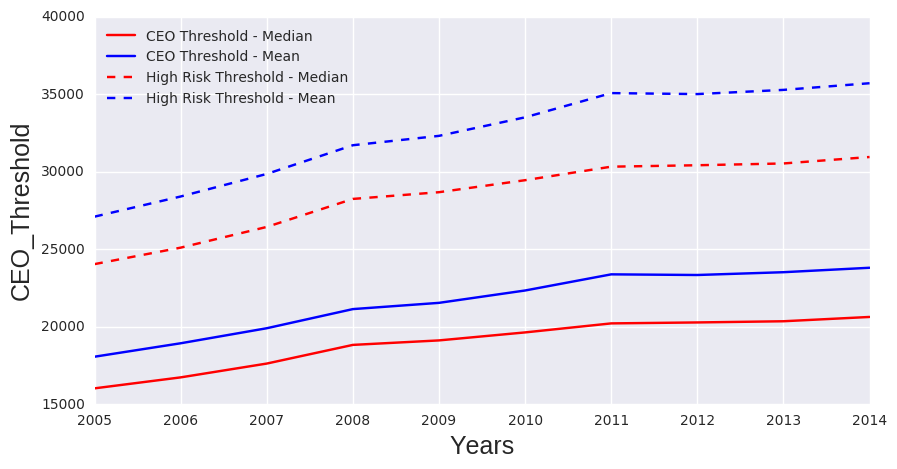

In [71]:
p_median = puma_ts.groupby('year').agg({'CEO_Threshold':'median', 'Threshold1':'median'})
p_mean = puma_ts.groupby('year').agg({'CEO_Threshold':'mean', 'Threshold1':'mean'})

fig = plt.figure(figsize=(10,5))
ax1 = fig.gca()
ax1.plot(p_median.index, p_median.CEO_Threshold, color = 'r', label = 'CEO Threshold - Median')
ax1.plot(p_mean.index, p_mean.CEO_Threshold, color = 'blue', label = 'CEO Threshold - Mean')
ax1.plot(p_median.index, p_median.Threshold1, 'r--', label = 'High Risk Threshold - Median')
ax1.plot(p_mean.index, p_mean.Threshold1, 'b--', label = 'High Risk Threshold - Mean')
ax1.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%d'))
plt.xlabel('Years', size = 18)
plt.ylabel('CEO_Threshold', size = 18)
plt.legend(loc = 'best')

In [84]:
p_risk = puma_ts.groupby(['year','Pov_risk']).agg({'CEO_Threshold': 'count' })

In [85]:
p_risk.reset_index(['Pov_risk', 'year'], inplace=True) 

In [101]:
thr = p_risk.groupby('year').agg({'CEO_Threshold':'sum'}).reset_index()
thr.columns = ['year', 'thr']

In [105]:
p_risk = p_risk.merge(thr, how='left', on='year')

In [108]:
p_risk['percent'] = (p_risk['CEO_Threshold'] / p_risk['thr'])*100

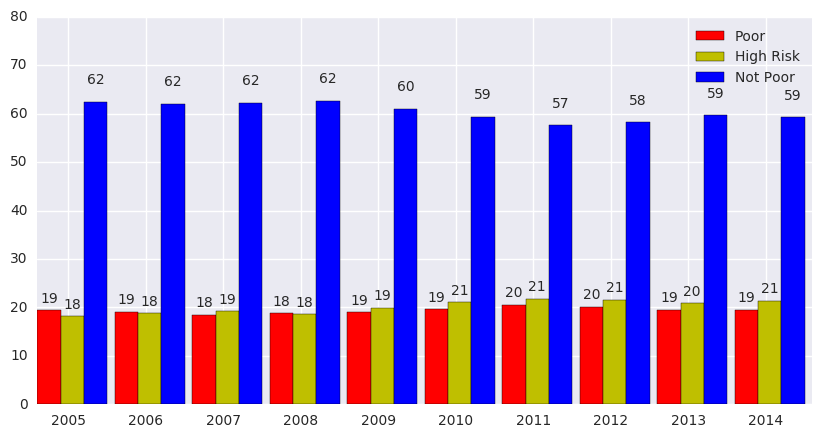

In [150]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

N = 10
ind = np.arange(N)
width = 0.30
rects1 = ax.bar(ind, p_risk[p_risk.Pov_risk == 0].percent, width, color='r')
rects2 = ax.bar(ind + width, p_risk[p_risk.Pov_risk == 1].percent, width, color='y')
rects3 = ax.bar(ind + 2*width, p_risk[p_risk.Pov_risk == 2].percent,  width, color='b')

ax.set_xticks(ind + width + 0.1)
ax.set_ylim(0, 80)
ax.set_xticklabels(('2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Poor', 'High Risk', 'Not Poor'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

In [152]:
puma_tss = puma.loc[:,['year', 'PUMA', 'CEO_Threshold', 'Pov_risk', 'Threshold1']]

In [155]:
p_risk.head()

,year,Pov_risk,CEO_Threshold,thr,percent
0,2005,0.0,4783,24700,19.364372
1,2005,1.0,4503,24700,18.230769
2,2005,2.0,15414,24700,62.404858
3,2006,0.0,4797,25126,19.091777
4,2006,1.0,4729,25126,18.821141


In [174]:
puma_tss_grp = puma_tss.groupby(['PUMA', 'year']).agg({'CEO_Threshold':'mean'}).reset_index(['PUMA','year'])
puma_tss_grp=puma_tss_grp.pivot(index='PUMA', columns='year', values='CEO_Threshold')

In [175]:
puma_tss_grp.head()

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
PUMA,,,,,,,,,,
3701,17204.138756,17634.331920,18738.134324,20323.410742,19964.902866,21037.207391,21727.429709,21696.148821,22207.764071,21648.320527
3702,19571.419498,20498.300088,21877.852013,22484.339776,22636.649391,23307.342247,24267.331478,24341.733811,24281.549656,24563.308565
3703,17298.072688,18349.195396,18989.896025,20548.271293,20618.197877,21207.653027,22942.564386,23350.515250,23528.518999,23136.279004
3704,18659.220072,19435.654732,20793.753882,21726.737134,22104.957799,23006.695112,23995.480585,24055.630183,23883.069862,25074.274037
3705,18702.355519,19980.436586,20848.084745,22116.169129,22174.420582,23763.820870,24371.385843,23892.233907,24269.272790,24353.709484


In [176]:
ts_mean = puma_tss_grp.iloc[:,:].mean(axis = 1)
ts_std = puma_tss_grp.iloc[:,:].std(axis = 1)
puma_tss_grp.iloc[:,:] = puma_tss_grp.iloc[:,:].apply(lambda x: (x-ts_mean)/ts_std)

In [183]:
len(puma_tss_grp)

55

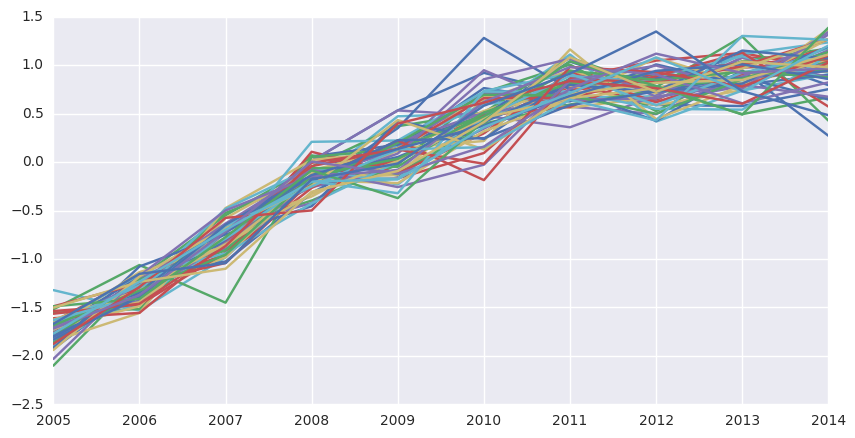

In [185]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

for i in xrange(len(puma_tss_grp)):
    plt.plot(range(2005,2015), puma_tss_grp.iloc[i,:])

ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%d'))

In [191]:
X = puma_tss_grp.iloc[:,:]
range_n_clusters = range(2,20)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.177635157756
For n_clusters =3, the average silhouette_score is :0.109789621948
For n_clusters =4, the average silhouette_score is :0.153977478418
For n_clusters =5, the average silhouette_score is :0.122412814924
For n_clusters =6, the average silhouette_score is :0.111238066033
For n_clusters =7, the average silhouette_score is :0.113583073893
For n_clusters =8, the average silhouette_score is :0.152061898013
For n_clusters =9, the average silhouette_score is :0.0983521632474
For n_clusters =10, the average silhouette_score is :0.119344395849
For n_clusters =11, the average silhouette_score is :0.166554732867
For n_clusters =12, the average silhouette_score is :0.168154238176
For n_clusters =13, the average silhouette_score is :0.161821328082
For n_clusters =14, the average silhouette_score is :0.191976849248
For n_clusters =15, the average silhouette_score is :0.19675156722
For n_clusters =16, the average silhouette_score is :0.2

In [192]:
#KMeans cluster
kmeans_cluster2 = KMeans(2, random_state= 125).fit(puma_tss_grp.iloc[:, :])
centers2 = kmeans_cluster2.cluster_centers_
puma_tss_grp['km2_labels'] = kmeans_cluster2.labels_

In [199]:
puma_tss_grp.reset_index(inplace=True)

In [200]:
puma_tss_grp.head()

year,PUMA,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,km2_labels
0,3701,-1.674373,-1.435390,-0.822201,0.058459,-0.140701,0.454990,0.838426,0.821049,1.105263,0.794479,0
1,3702,-1.861555,-1.324296,-0.524651,-0.173106,-0.084821,0.303940,0.860390,0.903517,0.868631,1.031950,0
2,3703,-1.646508,-1.178610,-0.893407,-0.199710,-0.168583,0.093808,0.866088,1.047684,1.126921,0.952318,0
3,3704,-1.698634,-1.333731,-0.695462,-0.256986,-0.079232,0.344559,0.809261,0.837530,0.756431,1.316264,0
4,3705,-1.838789,-1.211225,-0.785193,-0.162537,-0.133935,0.646493,0.944820,0.709546,0.894680,0.936140,1


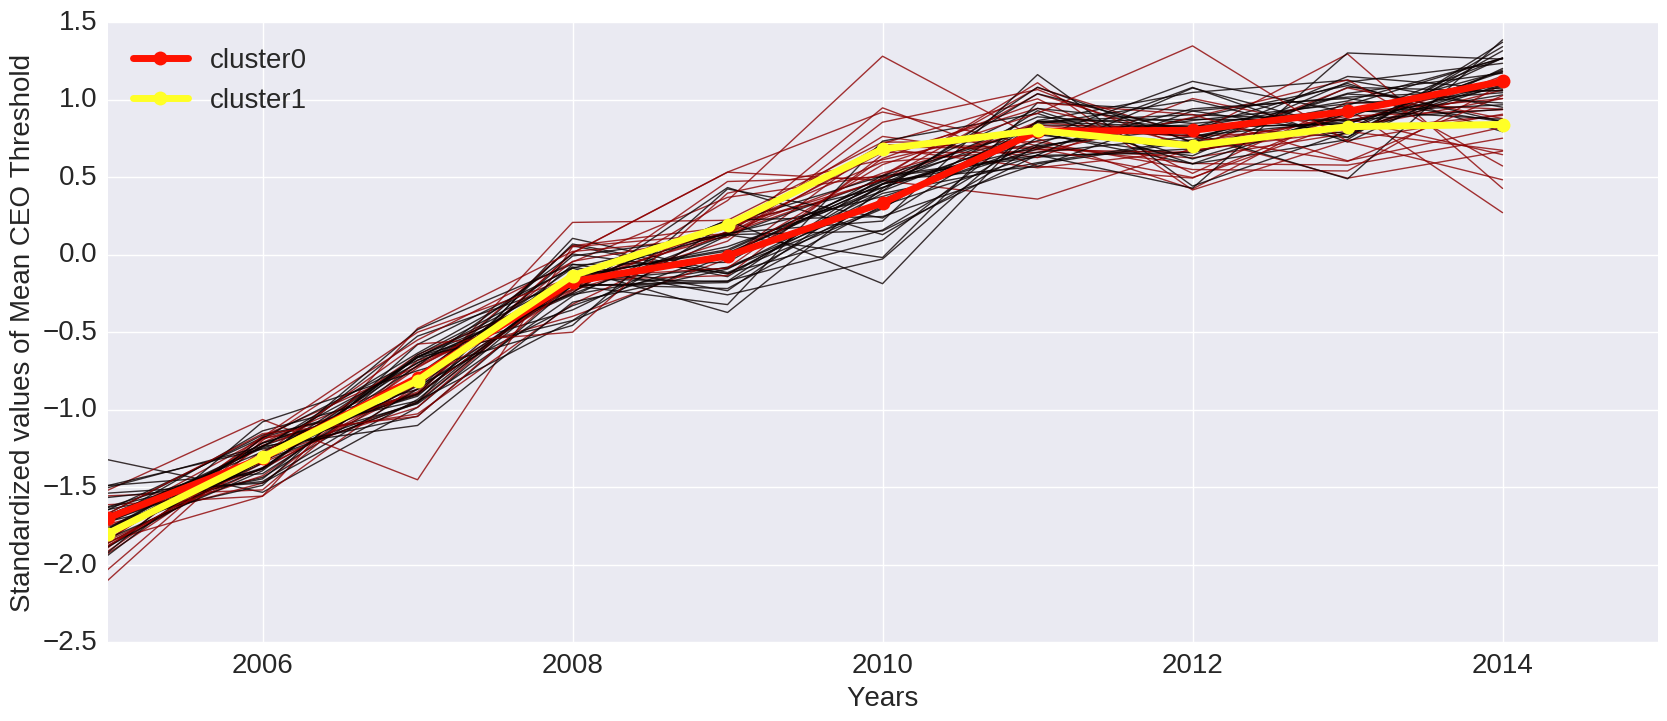

In [201]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
for i in range(len(puma_tss_grp)):
    ax.plot(range(2005,2015), puma_tss_grp.iloc[i,range(1,11)], '-', lw = 1, alpha = 0.8, c=cm.hot(puma_tss_grp.km2_labels[i]*50))

lines = range(len(centers2))    
for i in range(len(centers2)):
    line, = plt.plot(range(2005,2015),centers2[i], '.-', ms = 20, lw = 5, c=cm.hot(((i+1)*100)), label = 'cluster'+ str(i))
    lines[i] = (line)

plt.legend(handles=[lines[i] for i in range(len(centers2))], fontsize = 20, 
           loc = 'best')
plt.xlim(2005,2015)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Standardized values of Mean CEO Threshold", fontsize=20)
# plt.title('Time series of NYC Business establishments from 1994 to 2014 clustered into 2 groups', 
#           fontsize=22)

plt.show()

In [202]:
puma_tss_grp[puma_tss_grp.km2_labels == 0]

year,PUMA,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,km2_labels
0,3701,-1.674373,-1.435390,-0.822201,0.058459,-0.140701,0.454990,0.838426,0.821049,1.105263,0.794479,0
1,3702,-1.861555,-1.324296,-0.524651,-0.173106,-0.084821,0.303940,0.860390,0.903517,0.868631,1.031950,0
2,3703,-1.646508,-1.178610,-0.893407,-0.199710,-0.168583,0.093808,0.866088,1.047684,1.126921,0.952318,0
3,3704,-1.698634,-1.333731,-0.695462,-0.256986,-0.079232,0.344559,0.809261,0.837530,0.756431,1.316264,0
5,3706,-1.321433,-1.532334,-0.983624,-0.156243,-0.171309,0.500417,0.630848,0.683601,1.114374,1.235704,0
8,3709,-1.711639,-1.246455,-0.960674,-0.266795,0.199768,0.433491,0.776284,0.638873,1.080222,1.056925,0
10,3801,-1.643768,-1.445208,-0.657127,-0.355513,0.125456,0.487493,0.787572,0.586470,0.742856,1.371771,0
14,3805,-1.764403,-1.232022,-0.903304,-0.166481,0.008204,0.435182,0.736064,0.866596,0.974239,1.045925,0
19,3810,-1.782465,-1.213686,-0.898109,0.069868,-0.124109,0.396524,0.594590,0.743242,1.041861,1.172284,0
20,3901,-1.678644,-1.301005,-0.950013,0.106351,-0.114511,0.296918,0.929800,0.618572,0.908555,1.183977,0
